In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

from mlstats.modcomp import mcnemar

## project structure
DATA_DIR = "/data/projects/capturingBias/research/framing/data/" 
DATA_NPZ = DATA_DIR + "data2021.npz"

RESULTS_FULL = DATA_DIR + "results2021full.tsv"
RESULTS_TITLES = DATA_DIR + "results2021title.tsv"
RESULTS_DESCRIPTIONS = DATA_DIR + "results2021descriptions.tsv"
RESULTS_TRANSCRIPTIONS = DATA_DIR + "results2021transcriptions.tsv"

OUTPUT_FULL = DATA_DIR + "output2021full.npz"
OUTPUT_TITLES = DATA_DIR + "output2021titles.npz"
OUTPUT_DESCRIPTIONS = DATA_DIR + "output2021descriptions.npz"
OUTPUT_TRANSCRIPTIONS = DATA_DIR + "output2021transcriptions.npz"

## load files
data = np.load(DATA_NPZ)
y_crowd = data['y_crowd']
y_experts = data['y_experts']
y_combined = data['y_combined']

# retrieve indices of labeled samples
experts_pilot_idx = np.where(y_experts > -1)[0]  # equal pilot subset
crowd_all_idx = np.where(y_crowd > -1)[0]
combined_all_idx = np.where(y_combined > -1)[0]


results_full = pd.read_csv(RESULTS_FULL, delimiter='\t')
results_titles = pd.read_csv(RESULTS_TITLES, delimiter='\t')
results_descriptions = pd.read_csv(RESULTS_DESCRIPTIONS, delimiter='\t')
results_transcriptions = pd.read_csv(RESULTS_TRANSCRIPTIONS, delimiter='\t')

output_full = np.load(OUTPUT_FULL)['predictions']
output_titles = np.load(OUTPUT_TITLES)['predictions']
output_descriptions = np.load(OUTPUT_DESCRIPTIONS)['predictions']
output_transcriptions = np.load(OUTPUT_TRANSCRIPTIONS)['predictions']

output_idx = {experiment:i for i, experiment in enumerate(results_full.columns)}

In [2]:
# full
for e in results_full.columns:
    print('%s:\t%f' % (e, np.mean(results_full[e].values)))

ridge_experts_pilot:	0.615385
ridge_crowd_pilot:	0.416667
ridge_crowd_all:	0.541667
ridge_combined_all:	0.652174
bayes_experts_pilot:	0.615385
bayes_crowd_pilot:	0.500000
bayes_crowd_all:	0.500000
bayes_combined_all:	0.478261
bayes_inc:	0.544783
forest_experts_pilot_100:	0.572308
forest_crowd_pilot_100:	0.692500
forest_crowd_all_100:	0.555000
forest_combined_all_100:	0.506087
forest_experts_pilot_250:	0.573077
forest_crowd_pilot_250:	0.723333
forest_crowd_all_250:	0.552917
forest_combined_all_250:	0.466522
forest_experts_pilot_500:	0.571538
forest_crowd_pilot_500:	0.745000
forest_crowd_all_500:	0.544583
forest_combined_all_500:	0.438261
forest_experts_pilot_750:	0.583846
forest_crowd_pilot_750:	0.745000
forest_crowd_all_750:	0.542500
forest_combined_all_750:	0.430000
forest_experts_pilot_1000:	0.560769
forest_crowd_pilot_1000:	0.752500
forest_crowd_all_1000:	0.547083
forest_combined_all_1000:	0.425217
forest_experts_pilot_2000:	0.563077
forest_crowd_pilot_2000:	0.752500
forest_crowd_al

In [3]:
##### titles
for e in results_titles.columns:
    print('%s:\t%f' % (e, np.mean(results_titles[e].values)))

ridge_experts_pilot:	0.307692
ridge_crowd_pilot:	0.517241
ridge_crowd_all:	0.448276
ridge_combined_all:	0.425000
bayes_experts_pilot:	0.538462
bayes_crowd_pilot:	0.517241
bayes_crowd_all:	0.413793
bayes_combined_all:	0.470833
bayes_crowd_pilot_inc:	0.473333
bayes_crowd_all_inc:	0.506667
bayes_combined_all_inc:	0.505000
forest_experts_pilot_100:	0.382308
forest_crowd_pilot_100:	0.655172
forest_crowd_all_100:	0.655172
forest_combined_all_100:	0.433333
forest_experts_pilot_250:	0.382308
forest_crowd_pilot_250:	0.655172
forest_crowd_all_250:	0.655172
forest_combined_all_250:	0.404167
forest_experts_pilot_500:	0.382308
forest_crowd_pilot_500:	0.655172
forest_crowd_all_500:	0.655172
forest_combined_all_500:	0.389167
forest_experts_pilot_750:	0.384615
forest_crowd_pilot_750:	0.655172
forest_crowd_all_750:	0.655172
forest_combined_all_750:	0.408333
forest_experts_pilot_1000:	0.384615
forest_crowd_pilot_1000:	0.655172
forest_crowd_all_1000:	0.655172
forest_combined_all_1000:	0.408333
forest_exp

In [4]:
# descriptions
for e in results_descriptions.columns:
    print('%s:\t%f' % (e, np.mean(results_descriptions[e].values)))

ridge_experts_pilot:	0.615385
ridge_crowd_pilot:	0.583333
ridge_crowd_all:	0.666667
ridge_combined_all:	0.521739
bayes_experts_pilot:	0.692308
bayes_crowd_pilot:	0.333333
bayes_crowd_all:	0.375000
bayes_combined_all:	0.521739
bayes_inc:	0.573043
forest_experts_pilot_100:	0.711538
forest_crowd_pilot_100:	0.413333
forest_crowd_all_100:	0.478750
forest_combined_all_100:	0.606522
forest_experts_pilot_250:	0.724615
forest_crowd_pilot_250:	0.415000
forest_crowd_all_250:	0.477083
forest_combined_all_250:	0.616087
forest_experts_pilot_500:	0.739231
forest_crowd_pilot_500:	0.432500
forest_crowd_all_500:	0.476250
forest_combined_all_500:	0.628261
forest_experts_pilot_750:	0.735385
forest_crowd_pilot_750:	0.425833
forest_crowd_all_750:	0.483333
forest_combined_all_750:	0.633043
forest_experts_pilot_1000:	0.750769
forest_crowd_pilot_1000:	0.435000
forest_crowd_all_1000:	0.479583
forest_combined_all_1000:	0.636957
forest_experts_pilot_2000:	0.763077
forest_crowd_pilot_2000:	0.437500
forest_crowd_al

In [5]:
# transcriptions
for e in results_transcriptions.columns:
    print('%s:\t%f' % (e, np.mean(results_transcriptions[e].values)))

ridge_experts_pilot:	0.461538
ridge_crowd_pilot:	0.333333
ridge_crowd_all:	0.541667
ridge_combined_all:	0.478261
bayes_experts_pilot:	0.538462
bayes_crowd_pilot:	0.666667
bayes_crowd_all:	0.458333
bayes_combined_all:	0.565217
bayes_inc:	0.535652
forest_experts_pilot_100:	0.457692
forest_crowd_pilot_100:	0.778333
forest_crowd_all_100:	0.612083
forest_combined_all_100:	0.510435
forest_experts_pilot_250:	0.452308
forest_crowd_pilot_250:	0.790833
forest_crowd_all_250:	0.600000
forest_combined_all_250:	0.504348
forest_experts_pilot_500:	0.444615
forest_crowd_pilot_500:	0.811667
forest_crowd_all_500:	0.608333
forest_combined_all_500:	0.514348
forest_experts_pilot_750:	0.445385
forest_crowd_pilot_750:	0.814167
forest_crowd_all_750:	0.606250
forest_combined_all_750:	0.535652
forest_experts_pilot_1000:	0.441538
forest_crowd_pilot_1000:	0.810833
forest_crowd_all_1000:	0.605000
forest_combined_all_1000:	0.523478
forest_experts_pilot_2000:	0.432308
forest_crowd_pilot_2000:	0.805833
forest_crowd_al

# plot accuracies

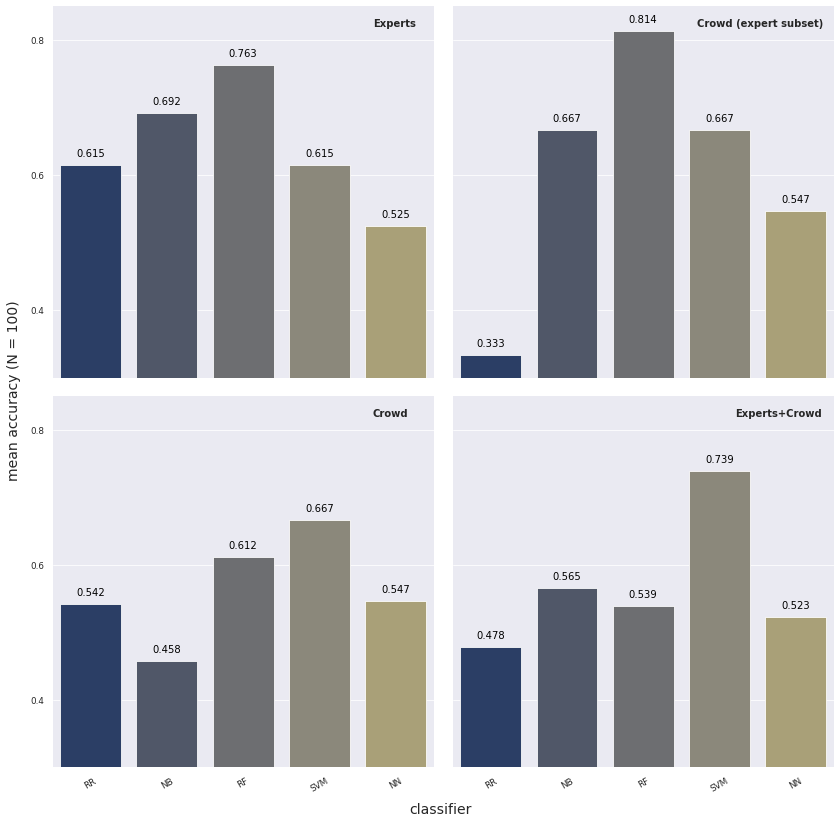

In [101]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize = (14, 14))
sns.set_theme(context='paper', palette='cividis')
sns.despine(left=True, bottom=True, trim=True)

experts = results_descriptions[['ridge_experts_pilot', 'bayes_experts_pilot', 'forest_experts_pilot_2000', 'svm_experts_pilot_rbf', 'nn_experts_pilot']]
chart = sns.barplot(ax=ax1, data=experts, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN'], rotation=30)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=3.7, y=0.82, s='Experts', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

crowdpilot = results_transcriptions[['ridge_crowd_pilot', 'bayes_crowd_pilot', 'forest_crowd_pilot_750', 'svm_crowd_pilot_poly', 'nn_crowd_all']]
chart = sns.barplot(ax=ax2, data=crowdpilot, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN'], rotation=30)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=2.7, y=0.82, s='Crowd (expert subset)', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

crowdall = results_transcriptions[['ridge_crowd_all', 'bayes_crowd_all', 'forest_crowd_all_100', 'svm_crowd_all_poly', 'nn_crowd_all']]
chart = sns.barplot(ax=ax3, data=crowdall, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN'], rotation=30)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=3.7, y=0.82, s='Crowd', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

combined = results_transcriptions[['ridge_combined_all', 'bayes_combined_all', 'forest_combined_all_2000', 'svm_combined_all_poly', 'nn_combined_all']]
chart = sns.barplot(ax=ax4, data=combined, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN'], rotation=30)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=3.2, y=0.82, s='Experts+Crowd', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

for ax in fig.get_axes():
    ax.label_outer()
    ax.title.set_position([.5, 1.1])
plt.subplots_adjust(hspace = 0.05, wspace = 0.05)

fig.text(0.51, 0.08, 'classifier', ha='center', fontsize=14)
fig.text(0.08, 0.5, 'mean accuracy (N = 100)', va='center', rotation='vertical', fontsize=14)

plt.savefig(DATA_DIR+'accuracy4barplot.pdf', dpi=300)

# wide layout

<ipython-input-104-156993551129>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experts['majority_class'] = np.array([0.5345]*100)
<ipython-input-104-156993551129>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crowdall['majority_class'] = np.array([0.5487]*100)
<ipython-input-104-156993551129>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

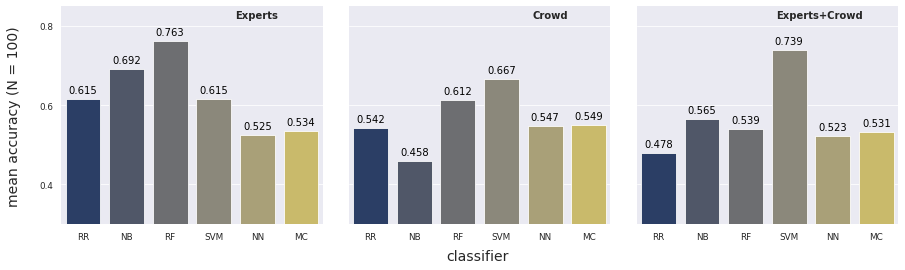

In [104]:
fig, ((ax1, ax2, ax3)) = plt.subplots(1, 3, figsize = (15, 4))
sns.set_theme(context='paper', palette='cividis')
sns.despine(left=True, bottom=True, trim=True)

experts = results_descriptions[['ridge_experts_pilot', 'bayes_experts_pilot', 'forest_experts_pilot_2000', 'svm_experts_pilot_rbf', 'nn_experts_pilot']]
experts['majority_class'] = np.array([0.5345]*100)
chart = sns.barplot(ax=ax1, data=experts, ci=None, zorder=1)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN', 'MC'], rotation=0)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=3.5, y=0.82, s='Experts', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

crowdall = results_transcriptions[['ridge_crowd_all', 'bayes_crowd_all', 'forest_crowd_all_100', 'svm_crowd_all_poly', 'nn_crowd_all']]
crowdall['majority_class'] = np.array([0.5487]*100)
chart = sns.barplot(ax=ax2, data=crowdall, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN', 'MC'], rotation=0)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=3.7, y=0.82, s='Crowd', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

combined = results_transcriptions[['ridge_combined_all', 'bayes_combined_all', 'forest_combined_all_2000', 'svm_combined_all_poly', 'nn_combined_all']]
combined['majority_class'] = np.array([0.5310]*100)
chart = sns.barplot(ax=ax3, data=combined, ci=None)
chart.set_xticklabels(['RR', 'NB', 'RF', 'SVM', 'NN', 'MC'], rotation=0)
for p in chart.patches:
    chart.annotate("%.3f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()+0.01),
                   ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                   textcoords='offset points')
chart.text(x=2.7, y=0.82, s='Experts+Crowd', fontsize=10, weight='bold')
chart.set_ylim(0.3, 0.85) 

for ax in fig.get_axes():
    ax.label_outer()
    ax.title.set_position([.5, 1.1])
plt.subplots_adjust(hspace = 0.05, wspace = 0.1)

fig.text(0.51, 0.0, 'classifier', ha='center', fontsize=14)
fig.text(0.075, 0.5, 'mean accuracy (N = 100)', va='center', rotation='vertical', fontsize=14)

plt.savefig(DATA_DIR+'accuracy3barplotW.pdf', dpi=300, bbox_inches='tight')

# statistical analysis

In [6]:
# NOTE: only test pilot experiments on pilot subset
def majority_vote(data, idx, num_classes=2):
    num_samples = idx.shape[0]
    vote = -np.ones(num_samples)
    idx_map = {idx:i for i,idx in enumerate(idx)}
    
    for i in idx:
        y = data[:, i].T
        y = y[y>-1]
        
        if y.shape[0] <= 0:
            # pick random if we lack a vote
            y = np.random.choice(np.arange(num_classes), 1)
            
        vote[idx_map[i]] = stats.mode(y).mode[0]
    
    return vote

In [160]:
# experts
agent_a = majority_vote(output_descriptions[output_idx['forest_experts_pilot_2000']], idx=experts_pilot_idx)
for model in ['ridge_experts_pilot', 'bayes_experts_pilot', 'svm_experts_pilot_rbf', 'nn_experts_pilot']:
    agent_b = majority_vote(output_descriptions[output_idx[model]], idx=experts_pilot_idx)
    p, Q = mcnemar(agent_a, agent_b)
    print("RF vs %s - p: %f" % (model, p))

RF vs ridge_experts_pilot - p: 0.731601
RF vs bayes_experts_pilot - p: 0.738883
RF vs svm_experts_pilot_rbf - p: 0.705457
RF vs nn_experts_pilot - p: 0.852684


In [48]:
# crowd
agent_a = majority_vote(output_transcriptions[output_idx['svm_crowd_all_poly']], idx=crowd_all_idx)
for model in ['ridge_crowd_all', 'bayes_crowd_all', 'forest_crowd_all_100', 'nn_crowd_all']:
    agent_b = majority_vote(output_transcriptions[output_idx[model]], idx=crowd_all_idx)
    p, Q = mcnemar(agent_a, agent_b)
    print("SVM vs %s - p: %f" % (model, p))

SVM vs ridge_crowd_all - p: 0.173568
SVM vs bayes_crowd_all - p: 0.093448
SVM vs forest_crowd_all_100 - p: 0.579100
SVM vs nn_crowd_all - p: 0.414216


In [155]:
# experts+crowd
agent_a = majority_vote(output_transcriptions[output_idx['svm_combined_all_poly']], idx=combined_all_idx)
for model in ['ridge_combined_all', 'bayes_combined_all', 'forest_combined_all_2000', 'nn_combined_all']:
    agent_b = majority_vote(output_transcriptions[output_idx[model]], combined_all_idx)
    p, Q = mcnemar(agent_a, agent_b)
    print("SVM vs %s - p: %f" % (model, p))

SVM vs ridge_combined_all - p: 0.029456
SVM vs bayes_combined_all - p: 0.038867
SVM vs forest_combined_all_2000 - p: 0.001370
SVM vs nn_combined_all - p: 0.070701


In [133]:
# crowd vs experts+crowds
agent_a = majority_vote(output_transcriptions[output_idx['ridge_crowd_all']], idx=crowd_all_idx)
agent_b = majority_vote(output_transcriptions[output_idx['ridge_combined_all']], idx=combined_all_idx)
p, Q = mcnemar(agent_a, agent_b)
print("RR - p: %f" % p)

agent_a = majority_vote(output_transcriptions[output_idx['bayes_crowd_all']], idx=crowd_all_idx)
agent_b = majority_vote(output_transcriptions[output_idx['bayes_combined_all']], idx=combined_all_idx)
p, Q = mcnemar(agent_a, agent_b)
print("NB - p: %f" % p)

agent_a = majority_vote(output_transcriptions[output_idx['forest_crowd_all_100']], idx=crowd_all_idx)
agent_b = majority_vote(output_transcriptions[output_idx['forest_combined_all_2000']], idx=combined_all_idx)
p, Q = mcnemar(agent_a, agent_b)
print("RF - p: %f" % p)

agent_a = majority_vote(output_transcriptions[output_idx['svm_crowd_all_poly']], idx=crowd_all_idx)
agent_b = majority_vote(output_transcriptions[output_idx['svm_combined_all_poly']], idx=combined_all_idx)
p, Q = mcnemar(agent_a, agent_b)
print("SVM - p: %f" % p)

agent_a = majority_vote(output_transcriptions[output_idx['nn_crowd_all']], idx=crowd_all_idx)
agent_b = majority_vote(output_transcriptions[output_idx['nn_combined_all']], idx=combined_all_idx)
p, Q = mcnemar(agent_a, agent_b)
print("NN - p: %f" % p)

RR - p: 0.271539
NB - p: 0.127508
RF - p: 0.605577
SVM - p: 0.024449
NN - p: 0.792849
